
___
## Recommender Systems with KNN 

It focusing on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, companies.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:
df = pd.read_csv("redcrow_ratings_1.csv")

In [3]:
df.head()

,investor_id,startup_id,ratings,location_id,location,domain_id,domain
0,AKM1MP6P0OYPR,132793040,5,1365811200,New York,10001,Medical Equipment
1,A2CX7LUOHB2NDG,321732944,5,1341100800,New York,10001,Medical Equipment
2,A2NWSAGRHCP8N5,439886341,1,1367193600,Boston,2215,Neurosciences
3,A2WNBOD3WNDNKT,439886341,3,1374451200,Richmond,23173,Beauty & Wellness
4,A1GI0U4ZRJA8WN,439886341,1,1334707200,Chicago,60007,Neurosciences


# EDA

Let's explore the data a bit and get a look at some of the best rated companies.

## Visualization Imports

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [5]:
combine_company_rating = df.dropna(axis = 0, subset = ['startup_id'])
company_ratingCount = (combine_company_rating.
     groupby(by = ['startup_id'])['ratings'].
     count().
     reset_index().
     rename(columns = {'ratings': 'totalRatingCount'})
     [['startup_id', 'totalRatingCount']]
    )
company_ratingCount.tail()

,startup_id,totalRatingCount
61889,B000IF4788,1001
61890,B000IF4FVC,1
61891,B000IF4G2A,1
61892,B000IF4TPY,156
61893,B000IF51UQ,65


In [6]:
rating_with_totalRatingCount = combine_company_rating.merge(company_ratingCount, left_on = 'startup_id', right_on = 'startup_id', how = 'left')
rating_with_totalRatingCount.head()

,investor_id,startup_id,ratings,location_id,location,domain_id,domain,totalRatingCount
0,AKM1MP6P0OYPR,132793040,5,1365811200,New York,10001,Medical Equipment,1
1,A2CX7LUOHB2NDG,321732944,5,1341100800,New York,10001,Medical Equipment,1
2,A2NWSAGRHCP8N5,439886341,1,1367193600,Boston,2215,Neurosciences,3
3,A2WNBOD3WNDNKT,439886341,3,1374451200,Richmond,23173,Beauty & Wellness,3
4,A1GI0U4ZRJA8WN,439886341,1,1334707200,Chicago,60007,Neurosciences,3


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


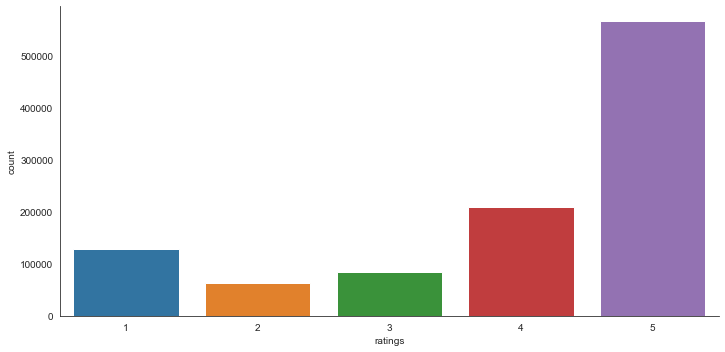

In [7]:
with sns.axes_style('white'):
    count_g = sns.factorplot("ratings", data=df, aspect=2.0,kind='count')


In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(company_ratingCount['totalRatingCount'].describe())

count   61894.000
mean       16.941
std        89.707
min         1.000
25%         1.000
50%         3.000
75%         9.000
max      9487.000
Name: totalRatingCount, dtype: float64


In [9]:
popularity_threshold = 500
rating_popular_company= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_company.head()

,investor_id,startup_id,ratings,location_id,location,domain_id,domain,totalRatingCount
183,A1BKC6B7YHYTVV,972683275,4,1405382400,Austin,73301,Orthopaedics,1051
184,AWVFSIB42LHKJ,972683275,4,1405209600,San Diego,91911,Cosmetics,1051
185,A36MQBNADRH8YY,972683275,5,1405641600,San Diego,91911,Beauty & Wellness,1051
186,A3SRXMPLAEZ6DP,972683275,4,1405987200,Austin,73301,Cosmetics,1051
187,A20XXTXWF2TCPY,972683275,5,1405123200,San Diego,91911,Sport Fitness,1051


In [10]:
len(df['startup_id'].unique())


61894

In [11]:
rating_popular_company.shape

(232864, 8)

In [12]:
## First lets create a Pivot matrix

company_features_df=rating_popular_company.pivot_table(index='startup_id',columns='investor_id',values='ratings').fillna(0)
company_features_df.head()

investor_id,A000428226SAAAIBK8I36,A0004478EF5NFPHLGCWG,A000681618A3WRMCK53V,A0015232111B3971DPSKF,A00177463W0XWB16A9O05,A00328401T70RFN4P1IT6,A00328742CDZTXNDCB9XW,A00471742QKXLMG5CCZQO,A00593764YDL3YS9LG2G,A00625243BI8W1SSZNLMD,...,AZZUGL25FXYZX,AZZURKWE5L0EU,AZZV2NAQL8KHQ,AZZV891DC7X6Q,AZZVLOF3WKLFW,AZZVYHVJ8BDUZ,AZZY5UXXCEH60,AZZYTPFG6JF1K,AZZYW4YOE1B6E,AZZYWDOD33FFE
startup_id,,,,,,,,,,,,,,,,,,,,,
972683275,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001P4XA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001P4ZH,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001WRSJ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00004SABB,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Let's create a ratings dataframe with average rating and number of ratings:

In [13]:
from scipy.sparse import csr_matrix

company_features_df_matrix = csr_matrix(company_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(company_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [14]:

company_features_df.shape

(218, 214593)

In [15]:
query_index = np.random.choice(company_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(company_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

104


In [16]:

company_features_df.head()

investor_id,A000428226SAAAIBK8I36,A0004478EF5NFPHLGCWG,A000681618A3WRMCK53V,A0015232111B3971DPSKF,A00177463W0XWB16A9O05,A00328401T70RFN4P1IT6,A00328742CDZTXNDCB9XW,A00471742QKXLMG5CCZQO,A00593764YDL3YS9LG2G,A00625243BI8W1SSZNLMD,...,AZZUGL25FXYZX,AZZURKWE5L0EU,AZZV2NAQL8KHQ,AZZV891DC7X6Q,AZZVLOF3WKLFW,AZZVYHVJ8BDUZ,AZZY5UXXCEH60,AZZYTPFG6JF1K,AZZYW4YOE1B6E,AZZYWDOD33FFE
startup_id,,,,,,,,,,,,,,,,,,,,,
972683275,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001P4XA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001P4ZH,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001WRSJ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00004SABB,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(company_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, company_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for B0002SQ2P2:

1: B0002WPSBC, with distance of 0.9899665370692464:
2: B000629GES, with distance of 0.9950595074907058:
3: B0001D3K8A, with distance of 0.9950996646838085:
4: B000HZDF8W, with distance of 0.995120658941823:
5: B000062VUO, with distance of 0.9952384495749214:
